<a href="https://colab.research.google.com/github/MaggieHDez/ClassFiles/blob/main/ProyectoProgADAP_255879.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Programación para Analítica Descriptiva y Predictiva**

## Nombre del Proyecto: Explorando Indicadores de Salud: BMI, Glucosa e Insulina
>Grupo: B\
>Autor: Margarita Cristina Hernández Delgadillo\
>Matrícula: 255879\
>Fecha: 03/11/2025

## **1. Introducción**

### Descripción del problema: ¿Qué queremos analizar o predecir?

En este proyecto se busca analizar el comportamiento del BMI, la glucosa en ayunas y los niveles de insulina en la muestra, detectando posibles outliers, diferencias entre géneros y grupos etarios, y la relación entre estas variables.

### Objetivo del análisis: ¿Qué impacto tendrá este análisis?

 El objetivo es clasificar y entender mejor la salud metabólica de la población estudiada, por ejemplo, ver en qué categorías se ubica el BMI y cómo se relaciona con otras variables. Esto nos ayudará a tener una base para análisis futuros y posibles acciones para mejorar la salud.

### Fuente de datos: ¿De dónde provienen los datos?

Los datos utilizados provienen de un archivo CSV que contiene registros de diversas personas, incluyendo información sobre su BMI, niveles de glucosa en ayunas y niveles de insulina.
#### Dataset
```
willian oliveira gibin, and Pooria Mostafapoor. (2025). Age National [Data set].
Kaggle. https://doi.org/10.34740/KAGGLE/DSV/10587919
```

Además de este Dataset, se utilizó el DataSet de la CDC para el cálculo del BMI de niños de 2 a 19 años, esto para poder clasificar el BMI correctamente
```
Selected percentiles and z-scores with LMS and sigma parameters [CSV – 122 KB], CDC,
https://www.cdc.gov/growthcharts/extended-bmi-data-files.htm
```

## **2. Captura y Carga de Datos**

### Explicación de la fuente de datos: ¿Cuáles son las fuentes de datos?, ¿Qué formato tienen los datos (CSV, SQL, API, etc.)?, ¿Cuántas observaciones y variables contiene el dataset?
Como se mencionó anteriomente el dataset se extrajo de
```
willian oliveira gibin, and Pooria Mostafapoor. (2025). Age National [Data set].
Kaggle. https://doi.org/10.34740/KAGGLE/DSV/10587919
```
El cual es un archivo tipo CSV con las siguiente información técnica:
```
- Columnas: 11
- Filas: 2278
- Variables:
  - Integer: 6
  - String: 2
  - Decimal: 2
  - Otras: 1
```

También el dataset `Selected percentiles and z-scores with LMS and sigma parameters` de la CDC se extrajo de
```
https://www.cdc.gov/growthcharts/extended-bmi-data-files.htm
```
Se está usando este dataset porque incluye los puntos de referencia oficiales de la CDC para el BMI en niños. Esto significa que, gracias a estos datos, podemos comparar el BMI de cada niño con una gran base de datos de niños de la misma edad y sexo. Así, sabemos si un niño está por debajo o por encima de lo "normal" (por ejemplo, en el percentil 5, 85 o 95), lo que nos ayuda a clasificarlo como bajo peso, saludable, sobrepeso u obesidad.

### Explicación sobre problemas en la carga de Datos y el Código para la carga de datos desde archivos (bibiotecas, etc.)

Estaré utilizando `pandas` para la lectura del archivo, la creación y manejo de DataFrames y para hacer operaciones de filtrado, limpieza, transformación y análisis estadístico, `matplotlib.pyplot` y `seaborn` para generar diagramas (como histogramas, boxplots y gráficos de dispersión) que ayudarán a visualizar la distribución de los datos y las relaciones entre las variables, facilitando la interpretación de los resultados.

Se cargaron los datos con `pd.read_csv()` y se revisaron las primeras 5 filas con `df.head()`. De esta forma se pudo confirmar que las columnas se leen correctamente y se identificó la estructura general del dataset. Por ejemplo, se observa información sobre ID, grupo de edad, edad, género, Body Mass Index (BMI), glucosa en ayunas, niveles de insulina y otras variables.

Con `df.shape` se determinó para el dataset `Age National` que el número de observaciones (filas) es 2278, y de las variables (columnas) es 11. Para `Selected percentiles and z-scores with LMS and sigma parameters` el número de oservaciones es 438 y de variables, 35.

In [104]:
# Conexión a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Carga de librerías y datasets

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import boxcox
from scipy.stats import shapiro
from sklearn.preprocessing import PowerTransformer

# Cargar el dataset
path = '/content/drive/MyDrive/ClassFiles/proyecto/Age National  body blood new.csv'
df= pd.read_csv(path)

# Mostrar las primeras filas para ver cómo se ven los datos
print("Primeras 5 filas del dataset:")
print(df.head())

# Número de observaciones (filas) y variables (columnas)
num_observaciones, num_variables = df.shape
print("\nNúmero de observaciones:", num_observaciones)
print("Número de variables:", num_variables)

# Cargar el dataset de la CDC
path_cdc = '/content/drive/MyDrive/ClassFiles/proyecto/bmi-age-2022.csv'
df_cdc= pd.read_csv(path_cdc)

# Mostrar las primeras filas para ver cómo se ven los datos
print("Primeras 5 filas del dataset:")
print(df_cdc.head())

# Número de observaciones (filas) y variables (columnas)
num_observaciones_cdc, num_variables_cdc = df_cdc.shape
print("\nNúmero de observaciones:", num_observaciones_cdc)
print("Número de variables:", num_variables_cdc)

Primeras 5 filas del dataset:
      ID Age_group  Age  Gender  PAQ605 Body Mass Index  \
0  73680  children   12       1       2              18   
1  74130  children   12       1       2            14,5   
2  74614  children   12       2       2            21,4   
3  74658  children   12       2       2            20,3   
4  74691  children   12       2       2            15,7   

   Blood Glucose after fasting  Diabetic or not  Respondent's Oral  \
0                           96                2                 83   
1                           85                2                 91   
2                           95                2                111   
3                           98                2                107   
4                           91                2                 94   

  Blood Insulin Levels percentage Body/Blood  
0                 10,8               166,67%  
1                10,86               133,52%  
2                15,56               137,53%  
3     

## **3. Transformación y Preprocesamiento - Data Wrangling**

### Identificación de Tipos de Datos

Con `df.info()` se determinó que el dataset cuenta con **2278 observaciones** y **11 variables**. Entre estas columnas se encuentran:
- **ID**: Identificador único (`int64`).
- **Age_group**: Grupo etario (`object`).
- **Age**: Edad (`int64`).
- **Género**: 1 representa masculino y 2 femenino (`int64`).
- **PAQ605**: Variable que representa la actividad laboral vigorosa, donde 1 es Sí, 2 No, 7 se negó a responder y 9 no sabe (`int64`).
- **Body Mass Index**: Índice de masa corporal, almacenado como tipo `object`.
- **Blood Glucose after fasting**: Glucosa en ayunas (`int64`).
- **Diabetic or not**: Estado diabético, donde 1 es Sí, 2 es No y 3 es prediabético (`int64`).
- **Respondent's Oral**: El nivel de glucosa oral (`int64`).
- **Blood Insulin Levels**: Niveles de insulina de tipo `object`.
- **percentage Body/Blood**: Porcentaje relacionado entre cuerpo e insuline en la sangre (también almacenado como `object`).

### Valores nulo

Aunque `df.info()` mostró que no hay datos nulos, se ejecutó `df.isnull().sum()` para confirmar que efectivamente no existen valores faltantes en ninguna columna. Esto nos da la confianza de que el dataset está completo y listo para el análisis.

### Observaciones adicionales

Se realizó la búsqueda de registros duplicados y su eliminación si es que hay y no aportan información adicional. Tambien se creó un boxplot para detectar datos atípicos en el DataSet.

La función `df.describe()` inicial nos dió un resumen de estadísticas básicas (media, desviación estándar, percentiles, etc.) para las variables numéricas. Esto permitió identificar rangos, posibles outliers y comprender la distribución de los datos.

Una vez hecho el Data Wrangling se realizaran nuevamente `df.info()` y `df.describe()` para verificar el cambio.

Algunas columnas del dataset con las que se desea trabajar, como `Body Mass Index` y `Blood Insulin Levels`, están almacenadas como tipo `object`, lo que indica la necesidad de conversión a tipo numérico para poder trabajar con ellas. Ya que se encontró que los datos de estas columnas utilizan "," en vez de "." para los números decimales, también se va a realizar el reemplazo de las comas a punto.

Otras observaciones son el transformar las variables `Gender`, `PAQ605` y `Diabetic or not` a variables categóricas, ya que estas representan clases o categorías; el convertir estas variables facilita el análisis de la información. Puedo también crear nuevas variable para categorizar el BMI como `Underweight`, `Healthy`, `Overweight`, `Obesity`, etc. y la glucosa como `Normal`, `Prediabetes` y `Diabetes`.

Para poder crear las variables de clasificación del BMI en caso de los niños de 2 a 19 años se deben utilizar las columnad `sex`, `agemos`, `p5`, `p85`, `p95` y `pct120ofP95` del archivo de la CDC incorporando estas y las columnas del Dataset `Age National` en un solo DataFrame. También se debe crear una columna `Age_in_months` en el Dataset `Age National` para poder comparar entre los dos archivos y clasificar el BMI.

También es recomendable la normalizacion de los nombres de las columnas para mejorar la legibilidad del código y prevenir errores en el procesamiento de los datos, especialmente al referirse a columnas en funciones o al aplicar transformaciones.

### Código para Transformación y Preprocesamiento

In [106]:
# ---------------------------------Inicio información DATASET Age National ---------------------------------------------
# Obtener información general del dataset
print("Información del dataset Age National:")
print(df.info())

# Verificar datos faltantes en cada columna
faltantes = df.isnull().sum()
print("\nDatos faltantes por columna:")
print(faltantes)

# Manejo de duplicados
duplicados = df.duplicated().sum()
if duplicados > 0:
  df.drop_duplicates(inplace=True)
  print("\nNúmero de filas duplicadas:", duplicados)
else:
  print("\nNo hay filas duplicadas en el dataset.")

# Obtener estadísticas descriptivas básicas para ver distribución y rangos
print("\nEstadísticas descriptivas:")
print(df.describe().to_string())

# ---------------------------------Fin DATASET Age National ---------------------------------------------
# ---------------------------------Inicio información DATASET CDC ---------------------------------------------
# Obtener información general del dataset
print("\nInformación del dataset de la CDC:")
print(df_cdc.info())

# Verificar datos faltantes en cada columna
faltantes = df_cdc.isnull().sum()
print("\nDatos faltantes por columna:")
print(faltantes)

# Manejo de duplicados
duplicados = df_cdc.duplicated().sum()
if duplicados > 0:
  df_cdc.drop_duplicates(inplace=True)
  print("\nNúmero de filas duplicadas:", duplicados)
else:
  print("\nNo hay filas duplicadas en el dataset.")

# Obtener estadísticas descriptivas básicas para ver distribución y rangos
print("\nEstadísticas descriptivas:")
print(df_cdc.describe())

# ---------------------------------Fin DATASET CDC ---------------------------------------------
# Elminamos filas innecesarias
df = df.drop(columns=['ID', 'PAQ605', "Respondent's Oral", 'percentage Body/Blood'])
# Conversión de tipos de datos, Body Mass Index, Blood Insulin Levels y percentage Body/Blood
# Reemplazamos también la coma por un punto
df['Body Mass Index'] = pd.to_numeric(df['Body Mass Index'].str.replace(',', '.'), errors='coerce')
df['Blood Insulin Levels'] = pd.to_numeric(df['Blood Insulin Levels'].str.replace(',', '.'), errors='coerce')

# Transformación a variables categóricas
df['Diabetic or not'] = df['Diabetic or not'].astype('category')
df['Age_group'] = df['Age_group'].astype('category')

# Renombrar las categorías utilizando cat.rename_categories
df['Diabetic or not'] = df['Diabetic or not'].cat.rename_categories({1: 'Yes', 2: 'No', 3: 'Prediabetes'})
df['Age_group'] = df['Age_group'].cat.rename_categories({'children': 'Children'})

# Nueva variable de Edad en meses
df['Age_in_months'] = df['Age'] * 12 + 0.5 # Se agrega 0.5 para igualarlo al dataset de la CDC

# DataFrame con solo las columnas necesarias para clasificación
df_cdc = df_cdc[['sex', 'agemos', 'P5', 'P85', 'P95', 'pct120ofP95']]

# Incorporación del DataSet y las columnas del DataSet de la CDC en uno
df_fusion = pd.merge(df, df_cdc, left_on=['Age_in_months', 'Gender'], right_on=['agemos', 'sex'], how='left')

# Función para clasificar el BMI usando los puntos de referancia del CDC
def categorize_bmi_cdc(row):
    bmi = row['Body Mass Index']
    age_group = row['Age_group']
    if age_group == 'Children':
    # Se verifica que existan los datos CDC necesarios
      if pd.isnull(row['P5']) or pd.isnull(row['P85']) or pd.isnull(row['P95']) or pd.isnull(row['pct120ofP95']):
        return "Sin datos CDC"
      if bmi < row['P5']:
          return "Underweight"
      elif bmi < row['P85']:
          return "Healthy"
      elif bmi < row['P95']:
          return "Overweight"
      elif bmi < row['pct120ofP95']:
          return "Obesity"
      else:
          return "Severe Obesity"
    else:
      if bmi < 18.5:
          return "Underweight"
      elif bmi >=18.5 and bmi < 24.9:
          return "Healthy"
      elif bmi >=25 and bmi < 29.9:
          return "Overweight"
      elif bmi >=30 and bmi < 39.9:
          return "Obesity"
      else:
          return "Severe Obesity"

# Aplicar la función para crear una nueva columna de clasificación del BMI según la CDC
df['BMI_category'] = df_fusion.apply(categorize_bmi_cdc, axis=1)
df['BMI_category'] = df['BMI_category'].astype('category')

# Transformamos despues de hacer la fusion de columnas y clasificación del BMI
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.rename_categories({1: 'Male', 2: 'Female'})

# Nueva variable para categorizar la glucosa
df['Glucose_category'] = pd.cut(df['Blood Glucose after fasting'], bins=[0, 99, 125, df['Blood Glucose after fasting'].max()],
                                labels=['Normal', 'Prediabetes', 'Diabetes'])

print('\n*******************************************************************\n')

# Normalizacion de columnas
print("\nColumnas originales:\n", df.columns)
# Convierte a minúsculas y reemplaza espacios con guión bajo
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Imprimir los nuevos nombres de las columnas
print("\nNuevos nombres en minúsculas y con guión bajo:\n", df.columns)

print('\n*******************************************************************\n')

print('\n Verificación de datos:\n', df.head())

Información del dataset Age National:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           2278 non-null   int64 
 1   Age_group                    2278 non-null   object
 2   Age                          2278 non-null   int64 
 3   Gender                       2278 non-null   int64 
 4   PAQ605                       2278 non-null   int64 
 5   Body Mass Index              2278 non-null   object
 6   Blood Glucose after fasting  2278 non-null   int64 
 7   Diabetic or not              2278 non-null   int64 
 8   Respondent's Oral            2278 non-null   int64 
 9   Blood Insulin Levels         2278 non-null   object
 10  percentage Body/Blood        2278 non-null   object
dtypes: int64(7), object(4)
memory usage: 195.9+ KB
None

Datos faltantes por columna:
ID                         

## **4. Análisis Descriptivo de Datos**

### Preguntas a responder con el AD

 - Observar cómo se distribuyen las variables principales (body_mass_index, blood_glucose_after_fasting, blood_insulin_levels, age, las variables categóricas gender y bmi_category):
- ¿Cuál es la media, mediana, moda y cuáles son sus percentiles?
- ¿Cómo se distribuyen estas variables y qué tan sesgadas se encuentran?
- ¿Qué outliers se pueden identificar y cómo afecta su presencia la calidad de los datos?

### Explicación de Estadísticas Básicas Aplicadas, Visualización de Datos con Gráficos

 - Primero se utiliza df.info(), df.describe() y df.mode() para obtener una visión general de la estructura y medidas estadísticas de los datos (tipo de dato, cantidad, media, mediana, percentiles y moda).
 - Después, se generan histogramas y countplot para visualizar la distribución de las variables y detectar posibles sesgos. También incluímos la asimetría y la curtosis para detectar si es necesario realizar la normalización.

#### Información y Estadísticas Básicas

Resultados con `df.info()`, `df.describe()`, `df.mode()`

In [107]:
# Estadísticas Básicas
print("\nInformación del dataset después de preprocesamiento:")
print(df.info())

print("\nEstadísticas descriptivas:\n")
print(df.describe().to_string())

print("\nModa:\n")
print(df.mode().iloc[0])


Información del dataset después de preprocesamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   age_group                    2278 non-null   category
 1   age                          2278 non-null   int64   
 2   gender                       2278 non-null   category
 3   body_mass_index              2278 non-null   float64 
 4   blood_glucose_after_fasting  2278 non-null   int64   
 5   diabetic_or_not              2278 non-null   category
 6   blood_insulin_levels         2278 non-null   float64 
 7   age_in_months                2278 non-null   float64 
 8   bmi_category                 2278 non-null   category
 9   glucose_category             2278 non-null   category
dtypes: category(5), float64(3), int64(2)
memory usage: 101.0 KB
None

Estadísticas descriptivas:

               age  body_mass_in

#### Visualización de Distribuciones

- Histogramas con askew y curtosis
- Boxplot y,
- Countplot

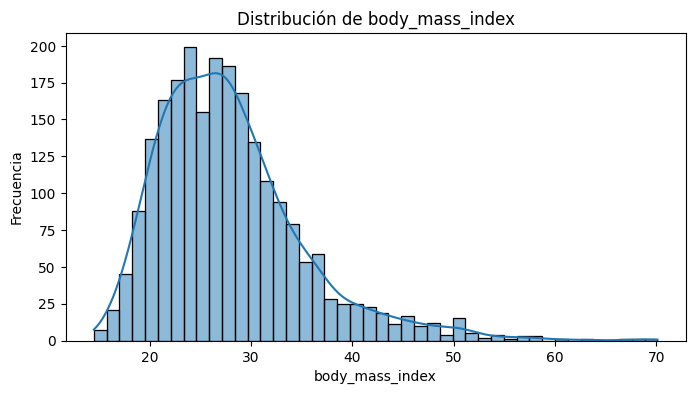


Asimetría de body_mass_index: 1.33
-> Asimetría alta; se recomienda aplicar una transformación (por ejemplo, Box-Cox o logarítmica).

Curtosis de body_mass_index: 2.90
-> Curtosis alta (leptokúrtica): colas pesadas, mayor riesgo de outliers.

------------------------------------------------------------------------------------------



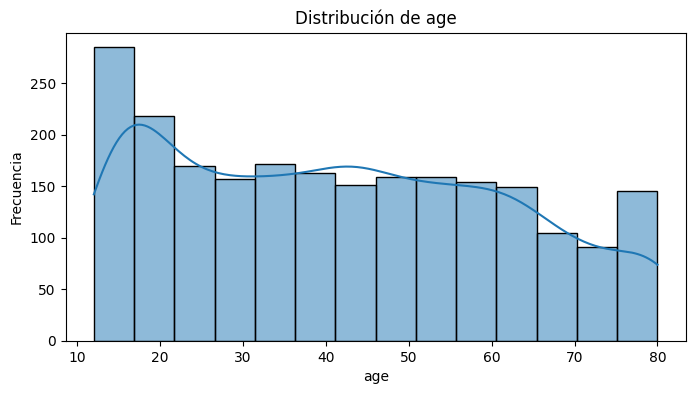


Asimetría de age: 0.24
-> Distribución casi simétrica; probablemente no necesita transformación.

Curtosis de age: -1.08
-> Curtosis baja (platykúrtica): colas ligeras, menos propensa a outliers extremos.

------------------------------------------------------------------------------------------



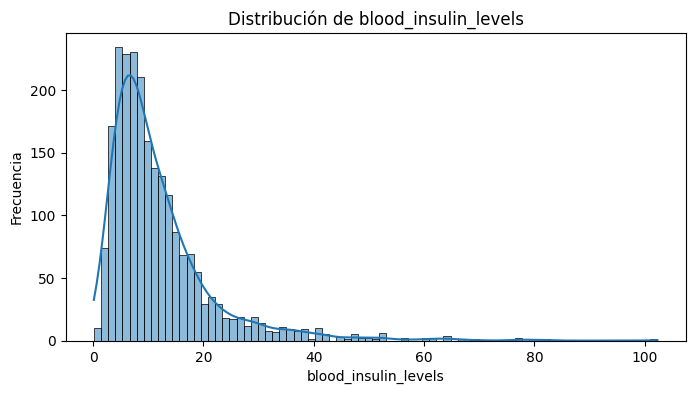


Asimetría de blood_insulin_levels: 2.78
-> Asimetría muy alta; transformación muy recomendable para normalizar la distribución.

Curtosis de blood_insulin_levels: 12.15
-> Curtosis alta (leptokúrtica): colas pesadas, mayor riesgo de outliers.

------------------------------------------------------------------------------------------



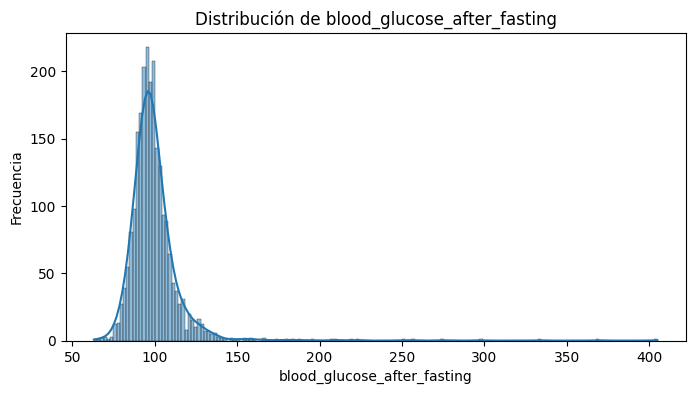


Asimetría de blood_glucose_after_fasting: 7.19
-> Asimetría muy alta; transformación muy recomendable para normalizar la distribución.

Curtosis de blood_glucose_after_fasting: 90.32
-> Curtosis alta (leptokúrtica): colas pesadas, mayor riesgo de outliers.

------------------------------------------------------------------------------------------



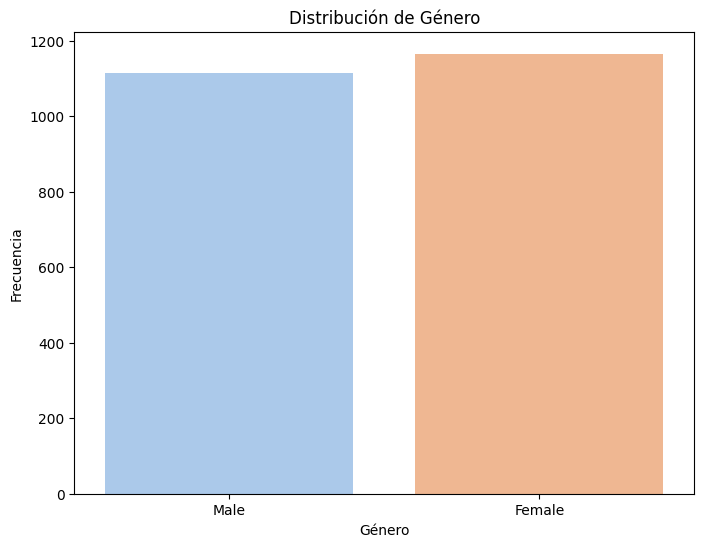


Frecuencia de cada categoría en 'gender':
gender
Female    1165
Male      1113
Name: count, dtype: int64

Porcentaje de cada categoría en 'gender':
gender
Female    51.141352
Male      48.858648
Name: proportion, dtype: float64

------------------------------------------------------------------------------------------



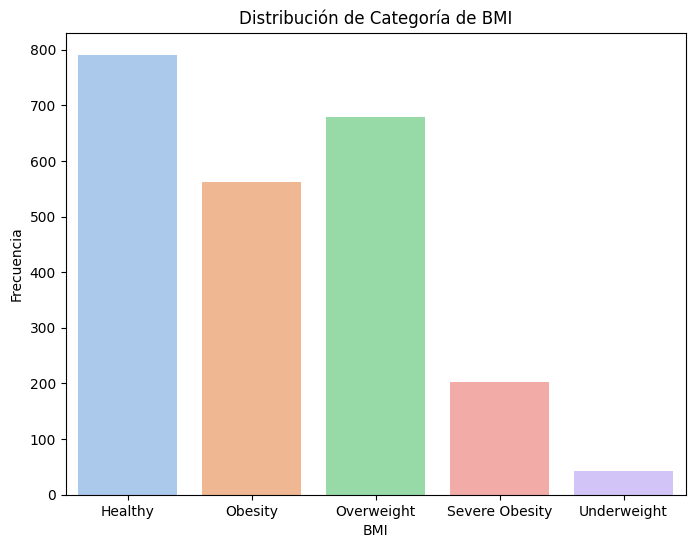


Frecuencia de cada categoría en 'bmi_category':
bmi_category
Healthy           791
Overweight        679
Obesity           563
Severe Obesity    203
Underweight        42
Name: count, dtype: int64

Porcentaje de cada categoría en 'bmi_category':
bmi_category
Healthy           34.723442
Overweight        29.806848
Obesity           24.714662
Severe Obesity     8.911326
Underweight        1.843723
Name: proportion, dtype: float64

------------------------------------------------------------------------------------------



In [108]:
# Lista de variables para visualizar su distribución
variables = ['body_mass_index', 'age', 'blood_insulin_levels', 'blood_glucose_after_fasting']

for var in variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

    # Calcular y mostrar el coeficiente de asimetría
    asimetria = df[var].skew()
    print(f"\nAsimetría de {var}: {asimetria:.2f}")

    # Evaluar la asimetría y dar recomendaciones
    # Se cambia la variable skewness con valor absoluto para que sea el mismo(positivo)
    if abs(asimetria) < 0.5:
        print("-> Distribución casi simétrica; probablemente no necesita transformación.")
    elif abs(asimetria) < 1:
        print("-> Asimetría moderada; puede considerarse una transformación dependiendo del análisis.")
    elif abs(asimetria) < 2:
        print("-> Asimetría alta; se recomienda aplicar una transformación (por ejemplo, Box-Cox o logarítmica).")
    else:
        print("-> Asimetría muy alta; transformación muy recomendable para normalizar la distribución.")

    # Calcular y mostrar el coeficiente de curtosis
    curtosis = df[var].kurtosis()  # Esto devuelve el exceso de curtosis (0 = normal)
    print(f"\nCurtosis de {var}: {curtosis:.2f}")

    # Evaluar la curtosis y dar recomendaciones
    if curtosis < -1:
        print("-> Curtosis baja (platykúrtica): colas ligeras, menos propensa a outliers extremos.")
    elif curtosis <= 1:
        print("-> Curtosis cercana a la normal (mesokúrtica): distribución similar a la normal.")
    else:
        print("-> Curtosis alta (leptokúrtica): colas pesadas, mayor riesgo de outliers.")

    print("\n" + "-"*90 + "\n") # formula para crear la línea separadora

# Visualización de la distribución de la variable gender mediante un countplot
plt.figure(figsize=(8,6))
sns.countplot(x='gender', data=df, palette='pastel', hue='gender')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

# Mostrar las frecuencias y porcentajes de cada categoría
print("\nFrecuencia de cada categoría en 'gender':")
print(df['gender'].value_counts())

print("\nPorcentaje de cada categoría en 'gender':")
print(df['gender'].value_counts(normalize=True) * 100)

print("\n" + "-"*90 + "\n") # formula para crear la línea separadora

# Visualización de la distribución de la variable gender mediante un countplot
plt.figure(figsize=(8,6))
sns.countplot(x='bmi_category', data=df, palette='pastel', hue='bmi_category')
plt.title('Distribución de Categoría de BMI')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.show()

# Mostrar las frecuencias y porcentajes de cada categoría
print("\nFrecuencia de cada categoría en 'bmi_category':")
print(df['bmi_category'].value_counts())

print("\nPorcentaje de cada categoría en 'bmi_category':")
print(df['bmi_category'].value_counts(normalize=True) * 100)

print("\n" + "-"*90 + "\n") # formula para crear la línea separadora

### Resumen de las respuestas

Después del preprocesamiento se pudo confirmar que el dataset consta de 2278 observaciones y 11 variables sin datos faltantes ni duplicados, lo que garantiza una base sólida para el análisis.

Utilizando `df.info()`, `df.describe()` y `df.mode()` se pudo identificar el tipo de cada variable es correcto, sus rangos, percentiles y dispersión.

Se detectó la asimetría y curtosis existente en las variables principales:
- La variable `body_mass_index` presenta una asimetría mderada que sugiere que puede ser un beneficio el aplicar una transformación.
- Las variables `blood_insulin_levels` y `blood_glucose_after_fasting` muestran asimetrías muy elevadas lo que sí justifica el aplicar una transformación para reducir el sesgo.
- Con la curtosis se detectó que variables `body_mass_index`, `blood_insulin_levels` y `blood_glucose_after_fasting` tienen colas pesadas y outliers.
- El análisis de la variable categórica `gender`, realizado mediante countplots y el cálculo de frecuencias, mostró una distribución equilibrada (aprox. 51% femenino y 49% masculino).
- También, el análisis de `bmi_category`. Los resultados muestran que la mayor parte de la población se concentra en `Healthy`, `Overweight` y `Obesity`:
 - Healthy: 34.72%
 - Overweight: 29.81%
 - Obesity: 24.71%
 - Severe Obesity: 8.91%
 - Underweight: 1.84%

 Esto significa que un 63.43% present algún grado de obesidad.

## **5. Análisis Exploratorio de los Datos**


### Preguntas a responder

 - ¿Cómo se relacionan las variables clave (por ejmplo, BMI, glucosa e insulina) entre sí?
 - ¿Qué impacto tienen los outliers en la distribución de estas variable?
 - ¿Existen diferencias en la distribución de las variables cuando se comparan diferentes subgrupos (por ejemplo, por género)?

### Estadísticas Empleadas y visualización

Se incluirá lo siguiente:
 - **Para la visualización de las relaciones entre variables:**
  - Pairplot para ver la relación entre variables numéricas.
  - Matriz de correlación(Heatmap) para detectar correlaciones lineales.
  
 - **Para la detección y el tratamiento de Outliers:**
  - Seguimos con la detección de outliers: se crean dos dataframes, uno que conserva los outliers y otro sin ellos, para comparar ambos enfoques. Esta comparación me permitirá evaluar el impacto de los outliers y determinar cuál modelo de clasificación es el más robusto.

 - **Para la transformación y normalización:**
  - Se aplicará las transformación Box-Cox a las variables que lo requieren. y compararán las distribuciones originales vs. las tranformadas con histograms y Q-Q plots.
  - Se realizará la prueba Shapiro-Wilk para evaluar la normailidad en el dataset original, el transformado y el dataset sin outliers y usaremos Q-Q plots para visualizar si la distribución se ajusta a una distribución normal.

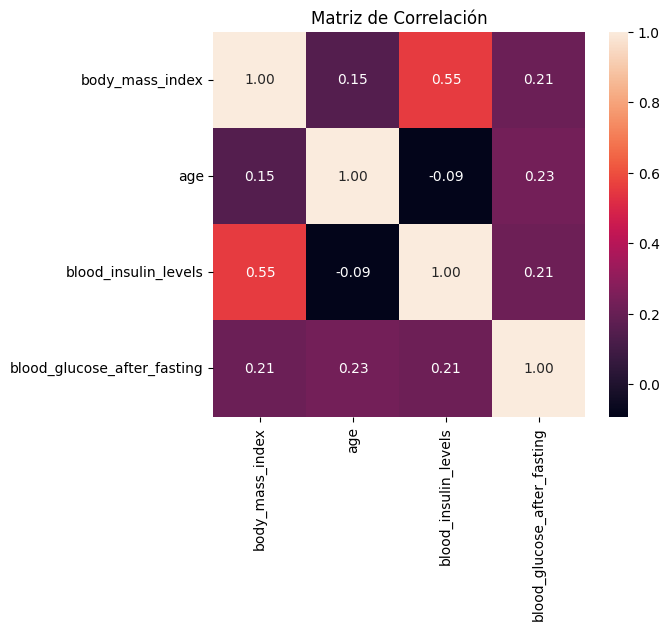


--------------------------------------------------------------------------------------------------------------------------------------------



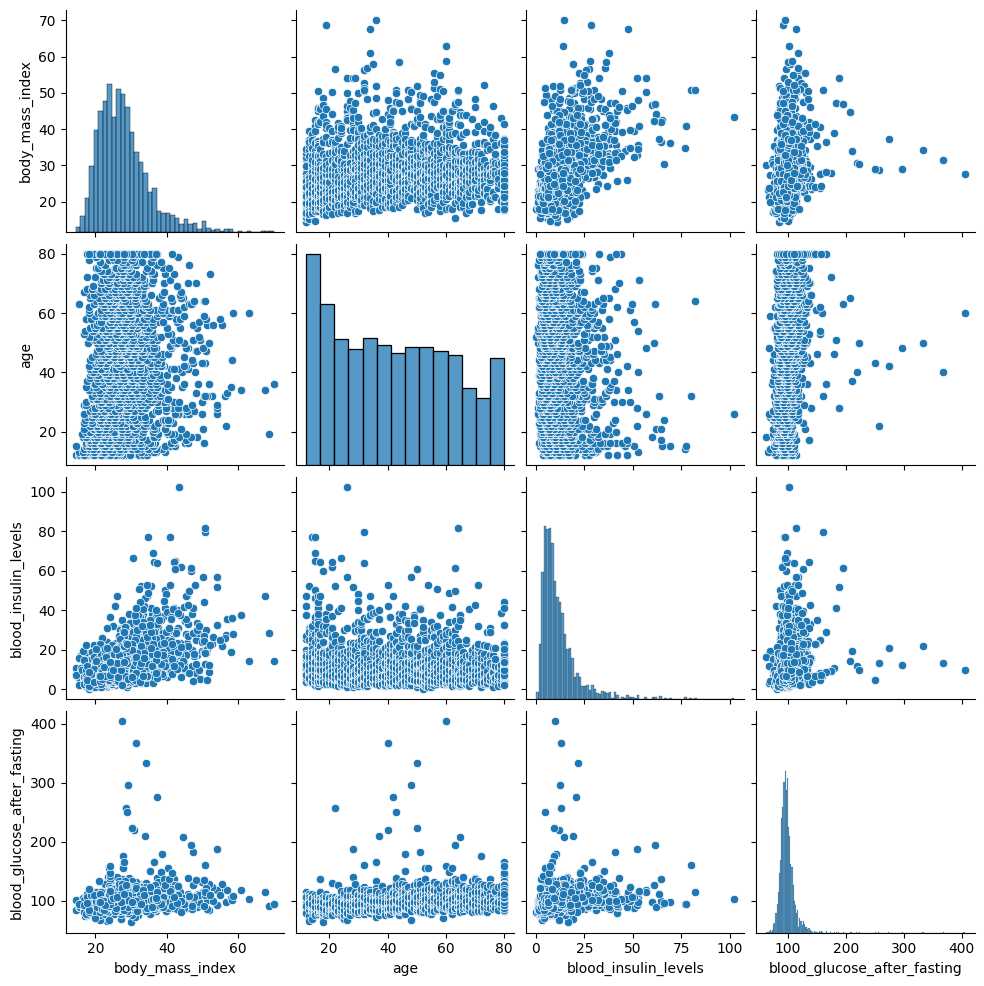

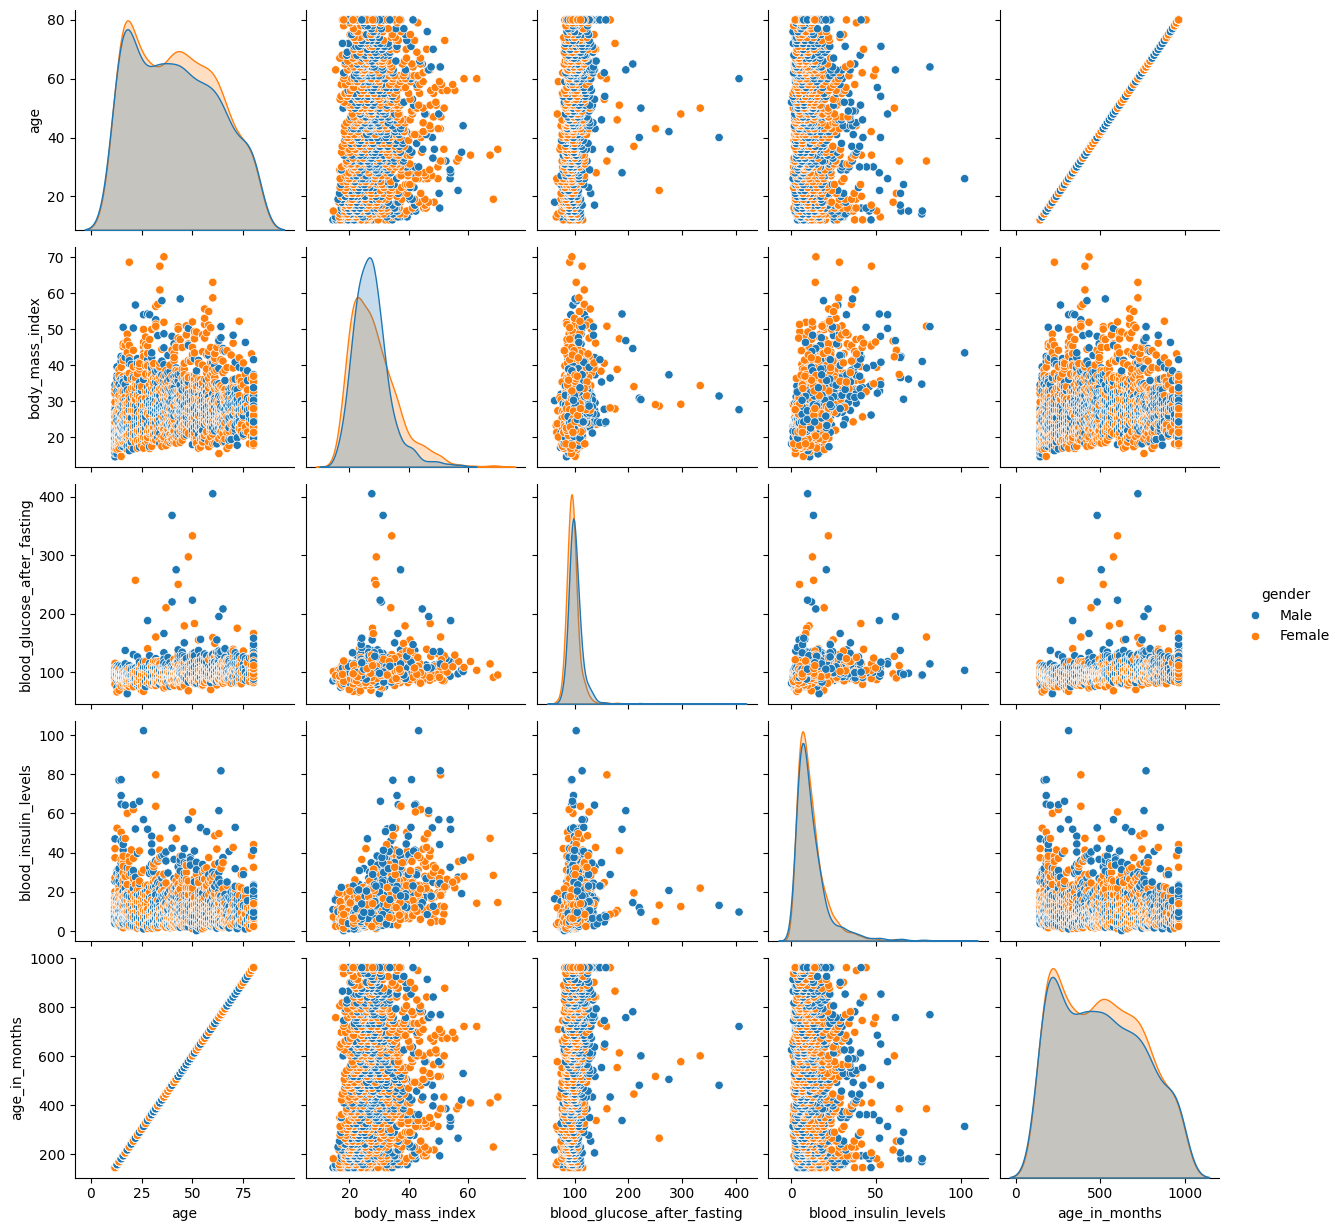


----------------------------------------------------------------------------------------------------


Resumen estadístico antes de la Eliminación :
       body_mass_index          age  blood_insulin_levels  blood_glucose_after_fasting
count      2278.000000  2278.000000           2278.000000                  2278.000000
mean         27.955180    41.795874             11.834794                    99.553117
std           7.248962    20.156111              9.718812                    17.889834
min          14.500000    12.000000              0.140000                    63.000000
25%          22.800000    24.000000              5.860000                    91.000000
50%          26.800000    41.000000              9.040000                    97.000000
75%          31.200000    58.000000             14.440000                   104.000000
max          70.100000    80.000000            102.290000                   405.000000


In [109]:
# Visualización
randframe = df[['body_mass_index', 'age', 'blood_insulin_levels', 'blood_glucose_after_fasting']]

# Matriz de correlación
plt.figure(figsize=(6, 5))
corr_matrix = randframe.corr()  # Calcula la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

print("\n" + "-"*140 + "\n") # formula para crear la línea separadora

# Pairplot
sns.pairplot(df[variables])
plt.show()

# Pairplot por género
sns.pairplot(df, hue='gender')
plt.show()

print("\n" + "-"*100 + "\n") # formula para crear la línea separadora

#imprimir las estadísticas del conjunto original
print("\nResumen estadístico antes de la Eliminación :")
print(randframe.describe().to_string())

#### Detección y Tratamiento de Outliers

Cálculo IQR y comparación entre dataframes

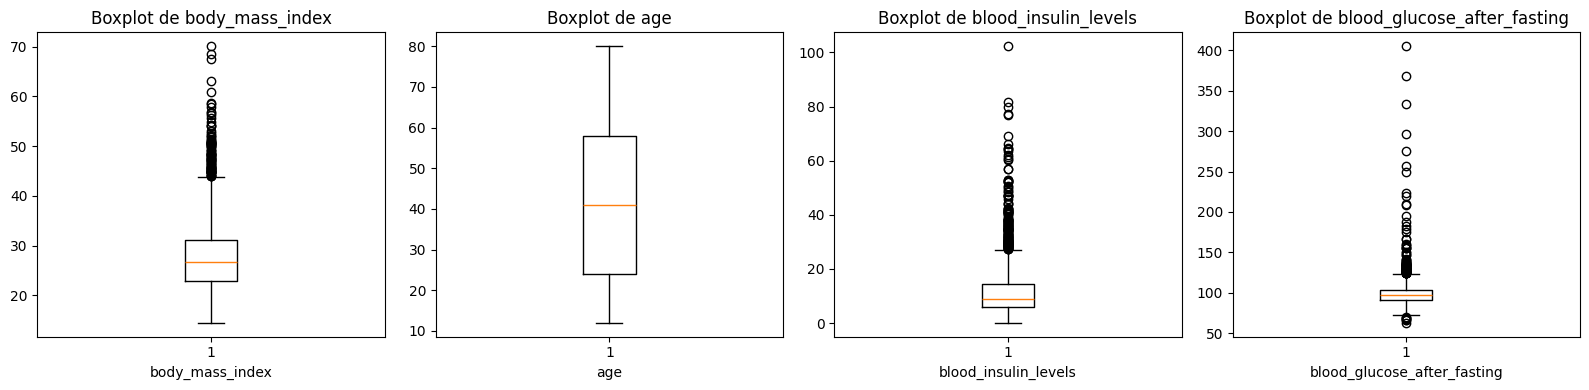

In [110]:
def proceso_outliers(df, variable, threshold=3.5):
  # Detecta y elimina outliers usando el método de la mediana absoluta de las desviaciones (MAD)
  # y muestra gráficos comparativos
  # antes y después de la eliminación de outliers.

    # Extraer la serie sin valores nulos
    data_series = df[variable].dropna()

    # Calcular la mediana y el MAD de la variable
    median_val = np.median(data_series)
    mad_val = np.median(np.abs(data_series - median_val))

    # Calcular el robust z-score para cada valor.
    # Se evita la división por cero si mad_val es cero.
    robust_z_scores = (data_series - median_val) / (mad_val if mad_val != 0 else 1)

    # Filtrar los datos cuyos robust z-score estén dentro del umbral
    mask = robust_z_scores.abs() <= threshold
    df_clean = df.loc[mask].copy()

    # Imprimir estadísticas descriptivas antes y después de remover outliers
    print(f"\nResumen estadístico de '{variable}' CON outliers:")
    print(data_series.describe())
    print(f"\nResumen estadístico de '{variable}' SIN outliers:")
    print(df_clean[variable].describe())

    # Gráficos: Histogramas
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(data_series, bins=10, color='blue', alpha=0.7, label='Original')
    plt.title(f"Distribución de '{variable}' CON Outliers")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(df_clean[variable].dropna(), bins=10, color='orange', alpha=0.7, label='Limpio')
    plt.title(f"Distribución de '{variable}' SIN Outliers")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Gráficos: Boxplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    sns.boxplot(y=data_series, ax=axes[0], color='skyblue')
    axes[0].set_title(f"{variable} Original")
    sns.boxplot(y=df_clean[variable].dropna(), ax=axes[1], color='skyblue')
    axes[1].set_title(f"{variable} Sin Outliers")
    plt.show()

    return df_clean

# Ejemplo de aplicación para múltiples variables:
# Se asume que 'variables' es una lista de nombres de columnas numéricas en el DataFrame 'df'
fig, axes = plt.subplots(1, len(variables), figsize=(16, 4))

for i, var in enumerate(variables):
    axes[i].boxplot(df[var].dropna())
    axes[i].set_title(f"Boxplot de {var}")
    axes[i].set_xlabel(var)

plt.tight_layout()
plt.show()


#### Normalización y transformación

Se estará aplicando la normalizacion a las variables que lo requieren

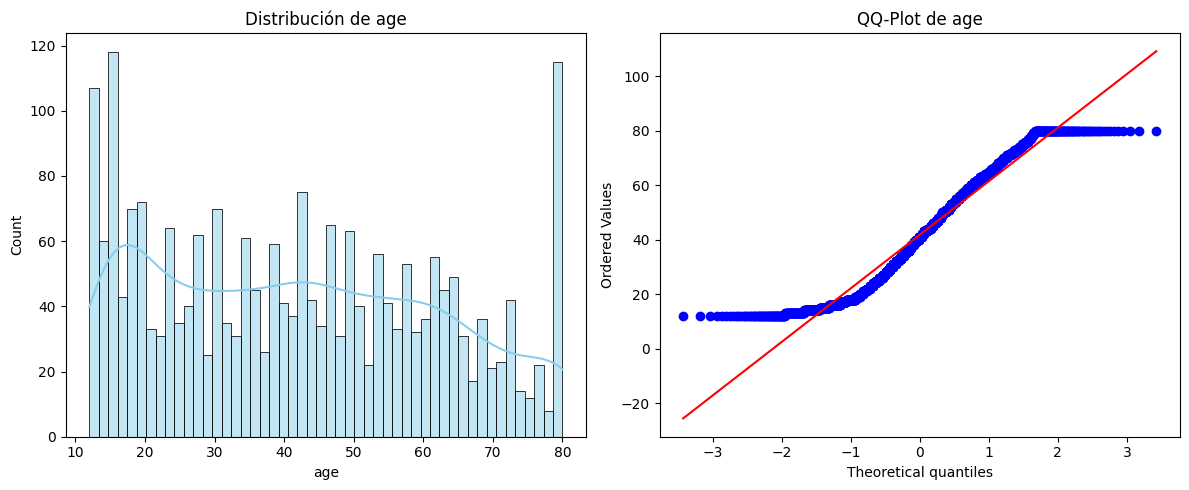


Pruebas de normalidad para la columna: age
Shapiro-Wilk Test: p-valor = 2.1911472781897856e-27
Kolmogorov-Smirnov Test: p-valor = 9.331021557367178e-13
Anderson-Darling Test: Estadístico = 27.66984
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 2.1109158177341918e-173
Cramér-von Mises Test: estadístico = 3.62414, p-valor = 3.1348426077215663e-09


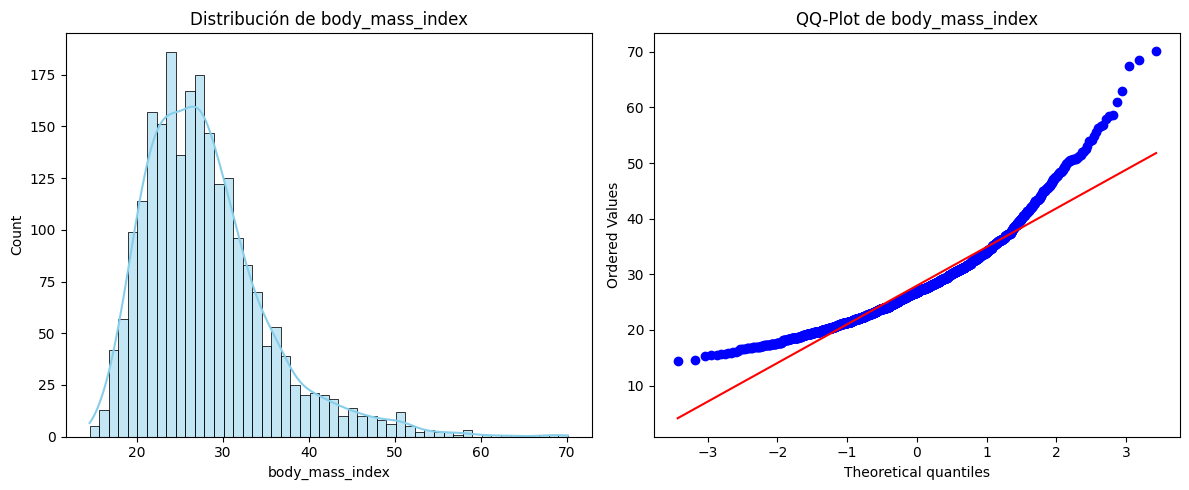


Pruebas de normalidad para la columna: body_mass_index
Shapiro-Wilk Test: p-valor = 1.766743485343994e-33
Kolmogorov-Smirnov Test: p-valor = 1.9728277458414907e-15
Anderson-Darling Test: Estadístico = 38.70785
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 2.7122326357245916e-124
Cramér-von Mises Test: estadístico = 6.02606, p-valor = 8.407941010091236e-12


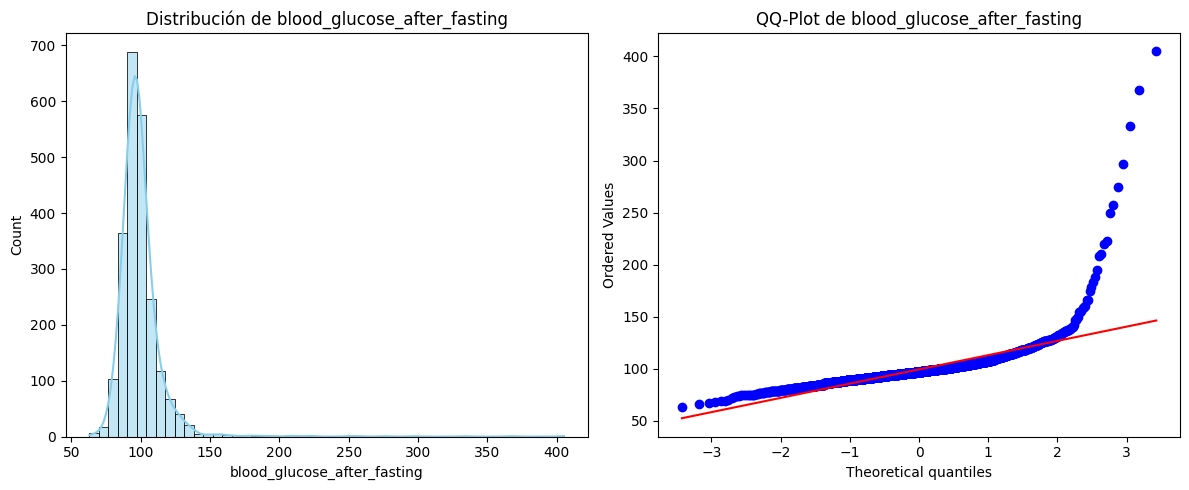


Pruebas de normalidad para la columna: blood_glucose_after_fasting
Shapiro-Wilk Test: p-valor = 7.025553497148901e-59
Kolmogorov-Smirnov Test: p-valor = 7.870949698547017e-61
Anderson-Darling Test: Estadístico = 146.51813
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.0
Cramér-von Mises Test: estadístico = 25.58165, p-valor = 4.38265068680721e-09


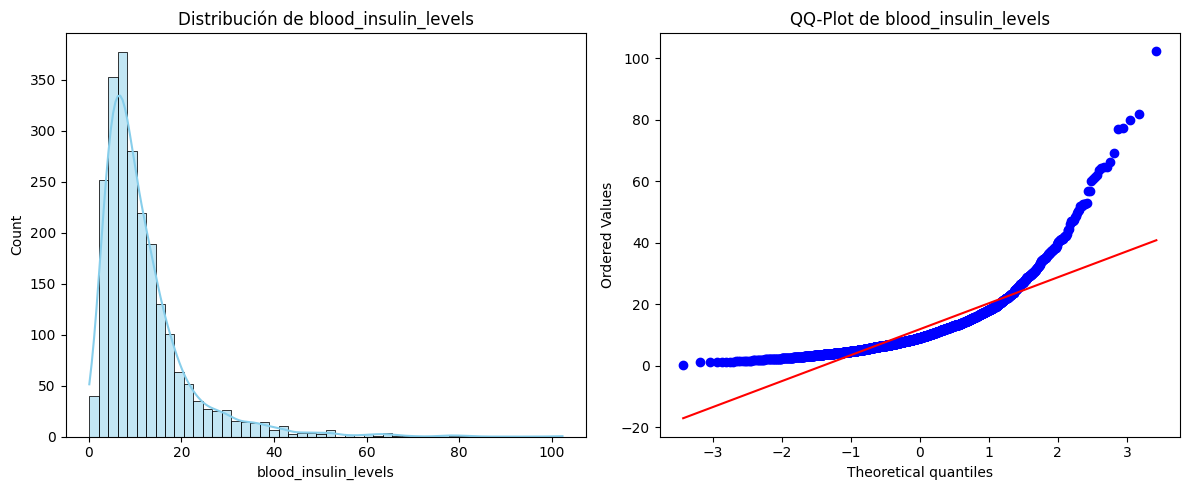


Pruebas de normalidad para la columna: blood_insulin_levels
Shapiro-Wilk Test: p-valor = 7.121708143350059e-50
Kolmogorov-Smirnov Test: p-valor = 8.594238789608384e-47
Anderson-Darling Test: Estadístico = 130.20974
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 3.696365911202981e-308
Cramér-von Mises Test: estadístico = 22.62837, p-valor = 6.663813612028946e-09


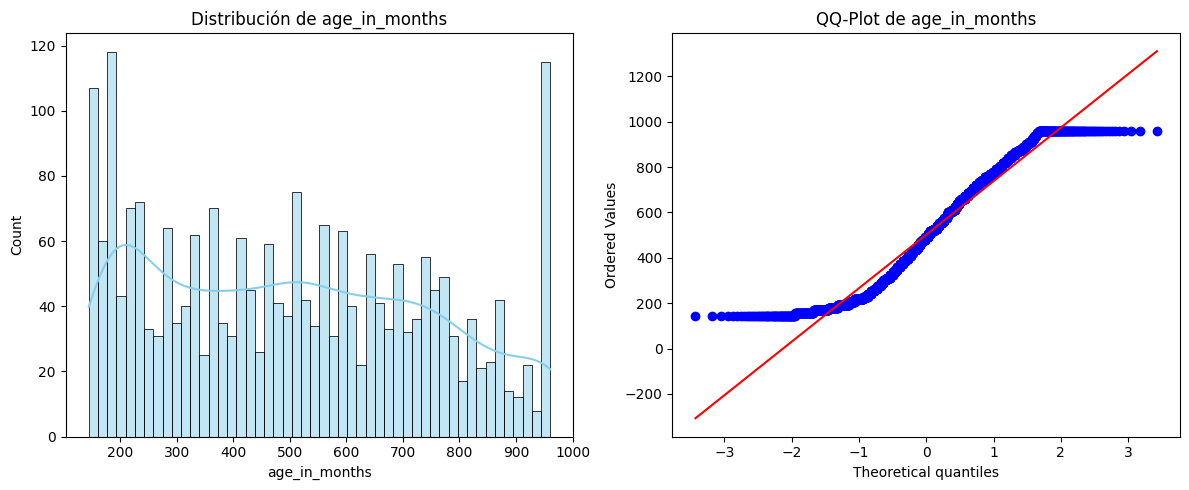


Pruebas de normalidad para la columna: age_in_months
Shapiro-Wilk Test: p-valor = 2.1911472781897856e-27
Kolmogorov-Smirnov Test: p-valor = 9.331021557360831e-13
Anderson-Darling Test: Estadístico = 27.66984
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 2.1109158177384027e-173
Cramér-von Mises Test: estadístico = 3.62414, p-valor = 3.1348423856769614e-09


In [111]:
# Seleccionar solo las columnas numéricas
columnas_pruebas = df.select_dtypes(include=[np.number]).columns

def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    # Limpiar datos nulos, no funciona sin eliminarlos
    data_clean = data.dropna()

    # Verificar si la columna tiene al menos dos valores únicos
    if data_clean.nunique() < 2:
        print(f"La columna {column_name} es constante. No se pueden realizar pruebas de normalidad.")
        return

    # Tomar una muestra para Shapiro-Wilk ya que es para menos datos
    sample_data = data_clean.sample(min(5000, len(data_clean)), random_state=42)

    try:
        # Prueba de Shapiro-Wilk
        shapiro_test = stats.shapiro(sample_data)
        print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:}")
    except Exception as e:
        print("Error en Shapiro-Wilk:", e)

    try:
        # Prueba de Kolmogorov-Smirnov
        ks_test = stats.kstest(data_clean, 'norm', args=(data_clean.mean(), data_clean.std()))
        print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:}")
    except Exception as e:
        print("Error en Kolmogorov-Smirnov:", e)

    try:
        # Prueba de Anderson-Darling
        anderson_test = stats.anderson(data_clean, dist='norm')
        print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
        for i in range(len(anderson_test.critical_values)):
            sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
            if anderson_test.statistic < cv:
                print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
            else:
                print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")
    except Exception as e:
        print("Error en Anderson-Darling:", e)

    try:
        # Prueba de D'Agostino-Pearson
        dagostino_test = stats.normaltest(data_clean)
        print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:}")
    except Exception as e:
        print("Error en D'Agostino-Pearson:", e)

    try:
        # Prueba de Cramér-von Mises
        cvm_test = stats.cramervonmises(data_clean, 'norm', args=(data_clean.mean(), data_clean.std()))
        print(f"Cramér-von Mises Test: estadístico = {cvm_test.statistic:.5f}, p-valor = {cvm_test.pvalue:}")
    except Exception as e:
        print("Error en Cramér-von Mises:", e)

def plot_distribution(data, column_name):
    # data_clean = data.dropna()  # Eliminar valores nulos, nuevamente para verificar
    plt.figure(figsize=(12, 5))

    # Histograma con KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribución de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.tight_layout()
    plt.show()

# Aplicar pruebas y gráficos a cada columna numérica
for column in columnas_pruebas:
    data = df[column]
    plot_distribution(data, column)
    normality_tests(data, column)



Procesando la variable: body_mass_index

--- Datos originales ---


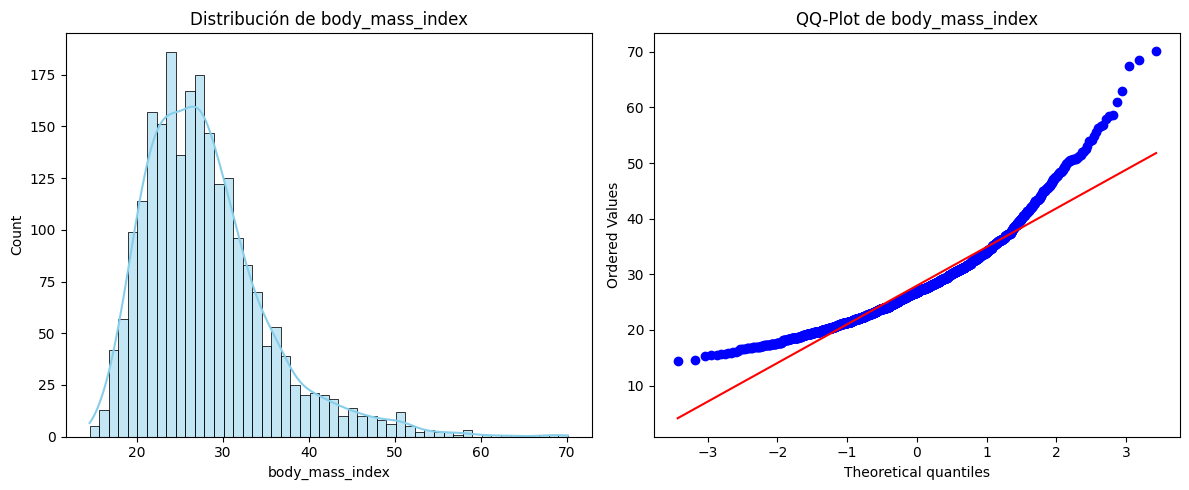


Pruebas de normalidad para la columna: body_mass_index
Shapiro-Wilk Test: p-valor = 1.766743485343994e-33
Kolmogorov-Smirnov Test: p-valor = 1.9728277458414907e-15
Anderson-Darling Test: Estadístico = 38.70785
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 2.7122326357245916e-124
Cramér-von Mises Test: estadístico = 6.02606, p-valor = 8.407941010091236e-12

Resumen estadístico de 'body_mass_index' CON outliers:
count    2278.000000
mean       27.955180
std         7.248962
min        14.500000
25%        22.800000
50%        26.800000
75%        31.200000
max        70.100000
Name: body_mass_index, dtype: float64

Resumen estadístico de 'body_mass_index' SIN outliers:
count  

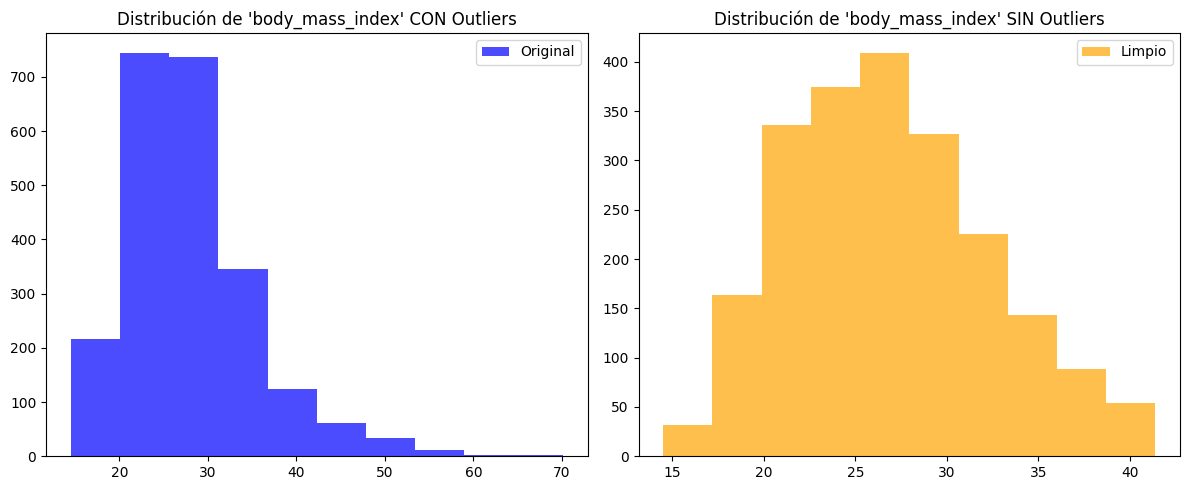

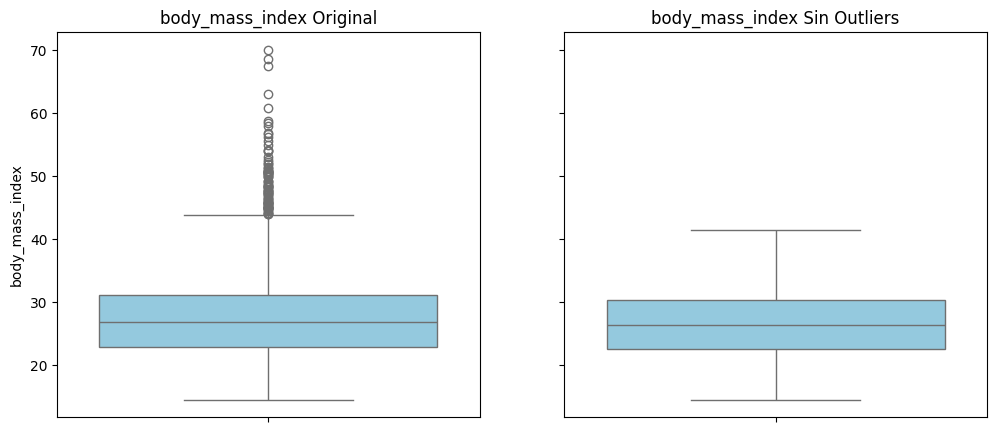


--- Datos sin outliers ---


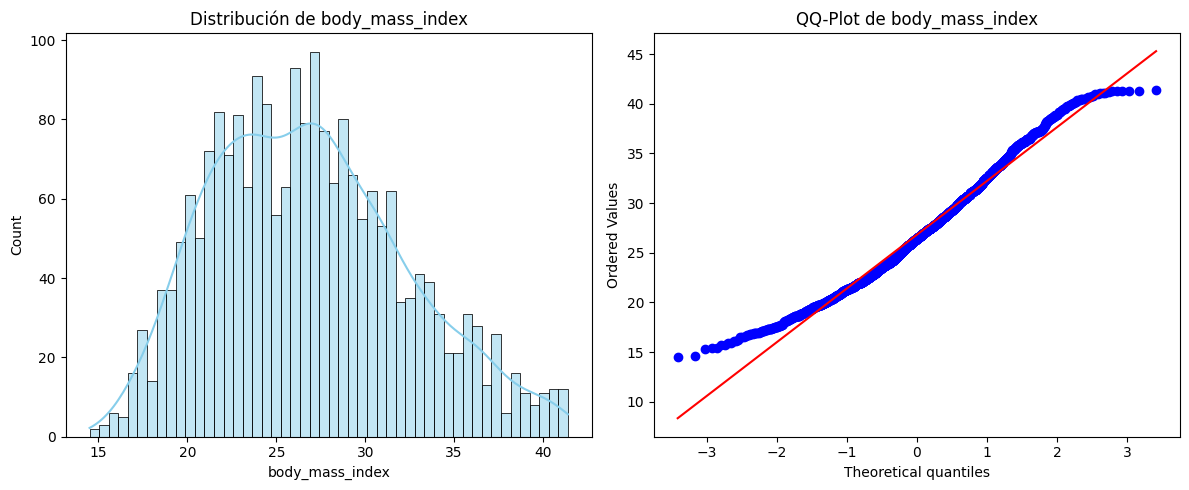


Pruebas de normalidad para la columna: body_mass_index
Shapiro-Wilk Test: p-valor = 1.0456435416676925e-15
Kolmogorov-Smirnov Test: p-valor = 4.3523654931542264e-05
Anderson-Darling Test: Estadístico = 8.78628
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 2.703735979000128e-16
Cramér-von Mises Test: estadístico = 1.25152, p-valor = 0.0006391805922215665

Lambda óptimo para Box-Cox en body_mass_index: -0.66
Estadísticas descriptivas de body_mass_index transformada:
count    2278.000000
mean        1.348146
std         0.027158
min         1.261267
25%         1.329135
50%         1.348889
75%         1.365652
max         1.431527
Name: body_mass_index_boxcox, dtype: float64


<ipython-input-112-20573bdb593b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[nueva_columna] = variable_boxcox


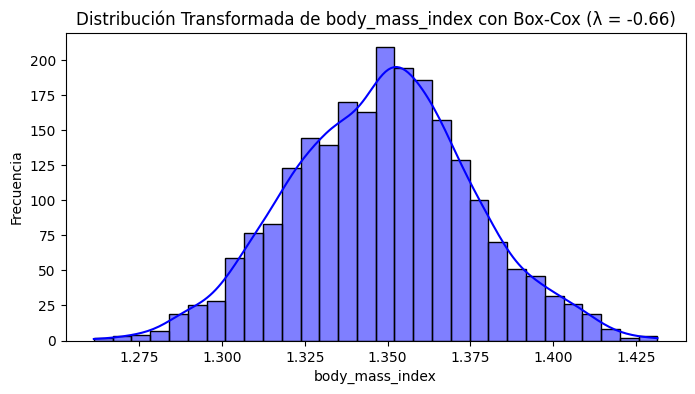


--- Datos transformados (Box-Cox) ---


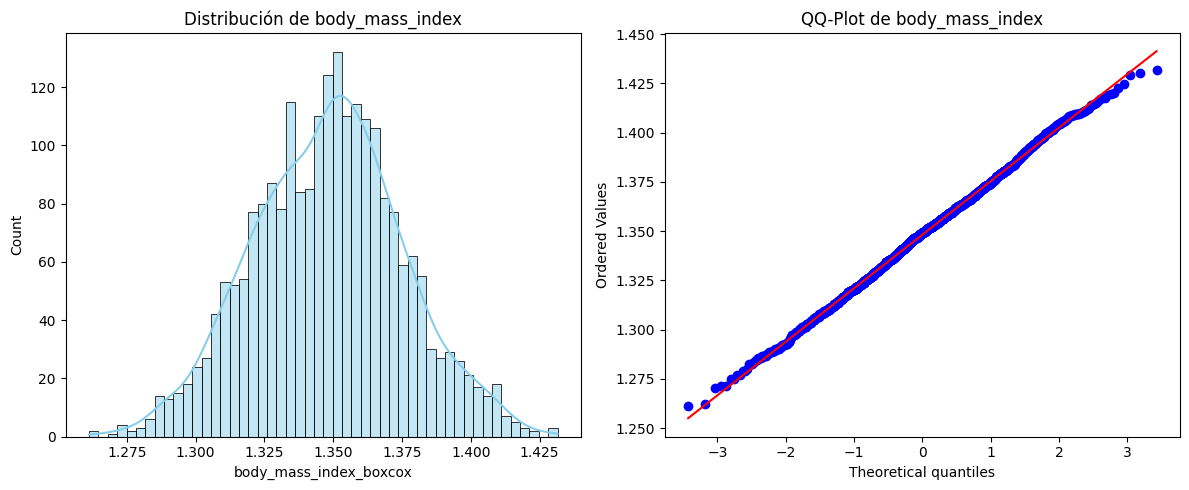


Pruebas de normalidad para la columna: body_mass_index
Shapiro-Wilk Test: p-valor = 0.17837909769837162
Kolmogorov-Smirnov Test: p-valor = 0.33258782323406466
Anderson-Darling Test: Estadístico = 0.62403
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos parecen normales.
  Al nivel de significancia 5.0%, los datos parecen normales.
  Al nivel de significancia 2.5%, los datos parecen normales.
  Al nivel de significancia 1.0%, los datos parecen normales.
D'Agostino-Pearson Test: p-valor = 0.546674522197582
Cramér-von Mises Test: estadístico = 0.11034, p-valor = 0.5365705508730436

Procesando la variable: blood_glucose_after_fasting

--- Datos originales ---


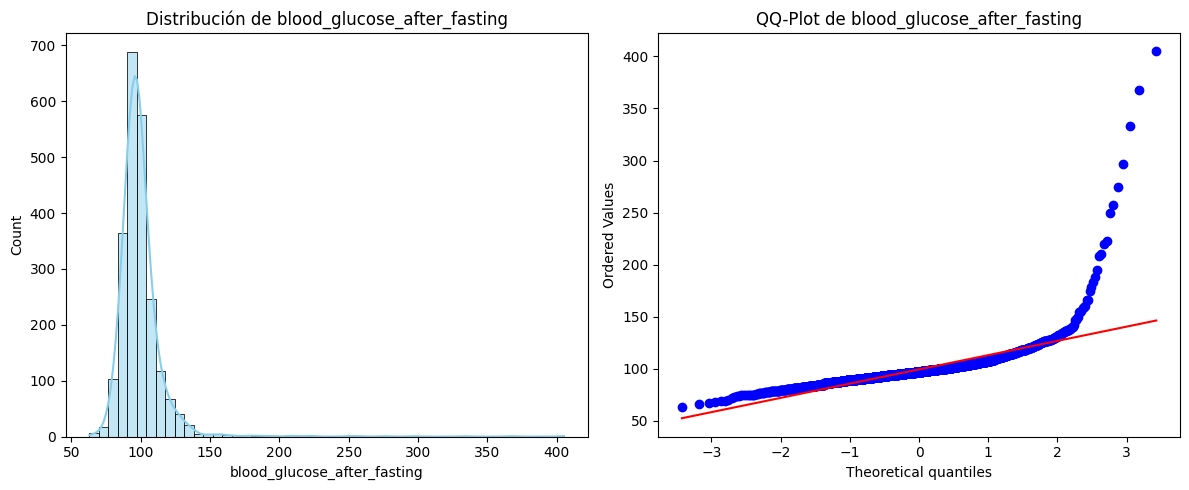


Pruebas de normalidad para la columna: blood_glucose_after_fasting
Shapiro-Wilk Test: p-valor = 7.025553497148901e-59
Kolmogorov-Smirnov Test: p-valor = 7.870949698547017e-61
Anderson-Darling Test: Estadístico = 146.51813
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.0
Cramér-von Mises Test: estadístico = 25.58165, p-valor = 4.38265068680721e-09

Resumen estadístico de 'blood_glucose_after_fasting' CON outliers:
count    2278.000000
mean       99.553117
std        17.889834
min        63.000000
25%        91.000000
50%        97.000000
75%       104.000000
max       405.000000
Name: blood_glucose_after_fasting, dtype: float64

Resumen estadístico de 'blood_glucose_after_fa

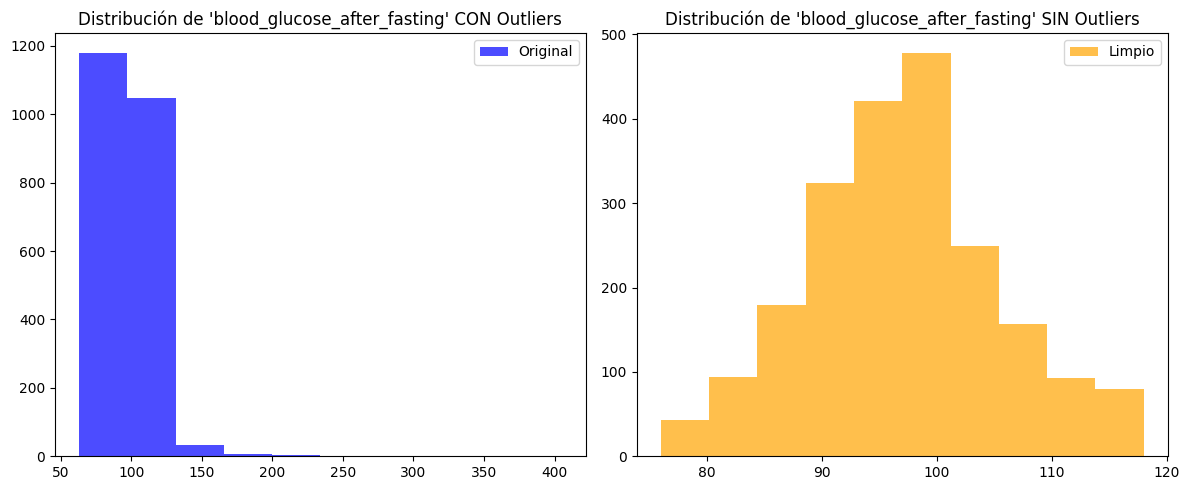

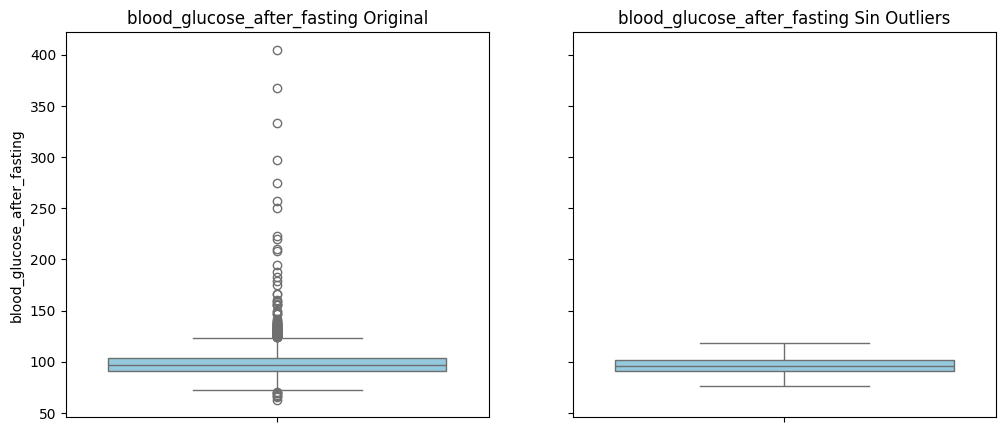


--- Datos sin outliers ---


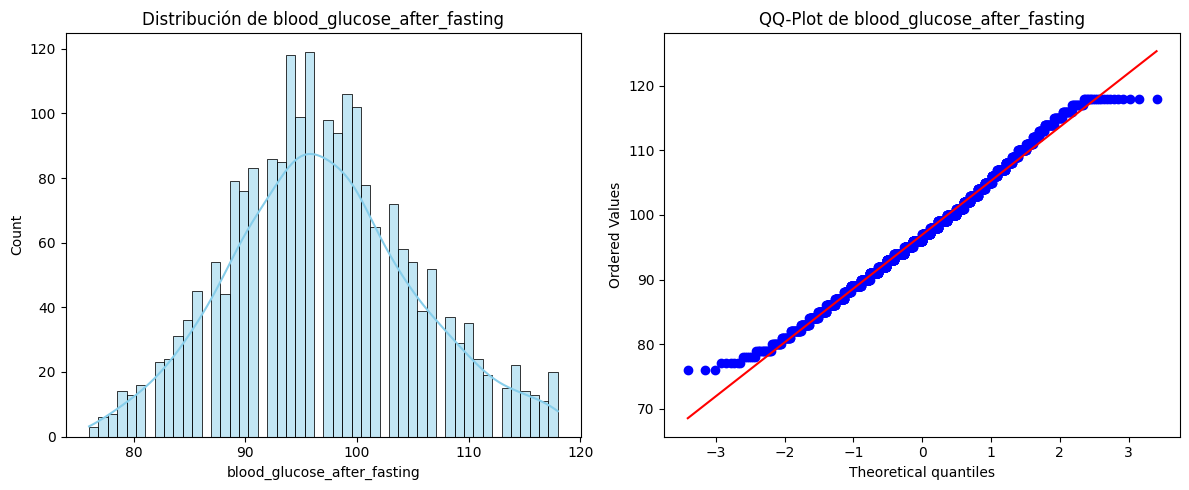


Pruebas de normalidad para la columna: blood_glucose_after_fasting
Shapiro-Wilk Test: p-valor = 6.784373238615392e-09
Kolmogorov-Smirnov Test: p-valor = 0.00016027416854103268
Anderson-Darling Test: Estadístico = 3.61396
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00014285716005962815
Cramér-von Mises Test: estadístico = 0.59065, p-valor = 0.023597631834421984

Lambda óptimo para Box-Cox en blood_glucose_after_fasting: -2.04
Estadísticas descriptivas de blood_glucose_after_fasting transformada:
count    2278.000000
mean        0.490700
std         0.000010
min         0.490638
25%         0.490694
50%         0.490700
75%         0.490706
max         0.490741
Name: blood

<ipython-input-112-20573bdb593b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[nueva_columna] = variable_boxcox


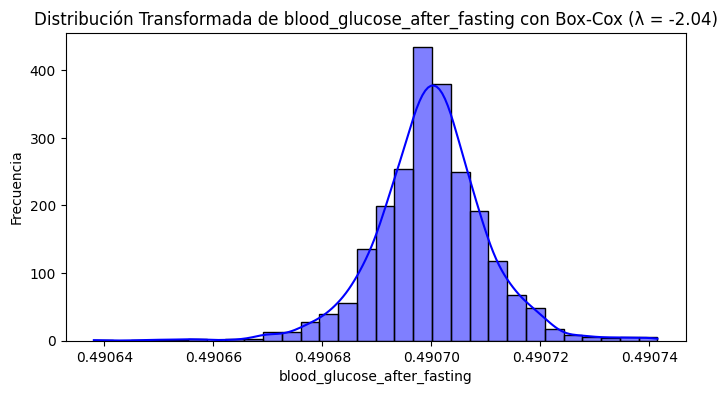


--- Datos transformados (Box-Cox) ---


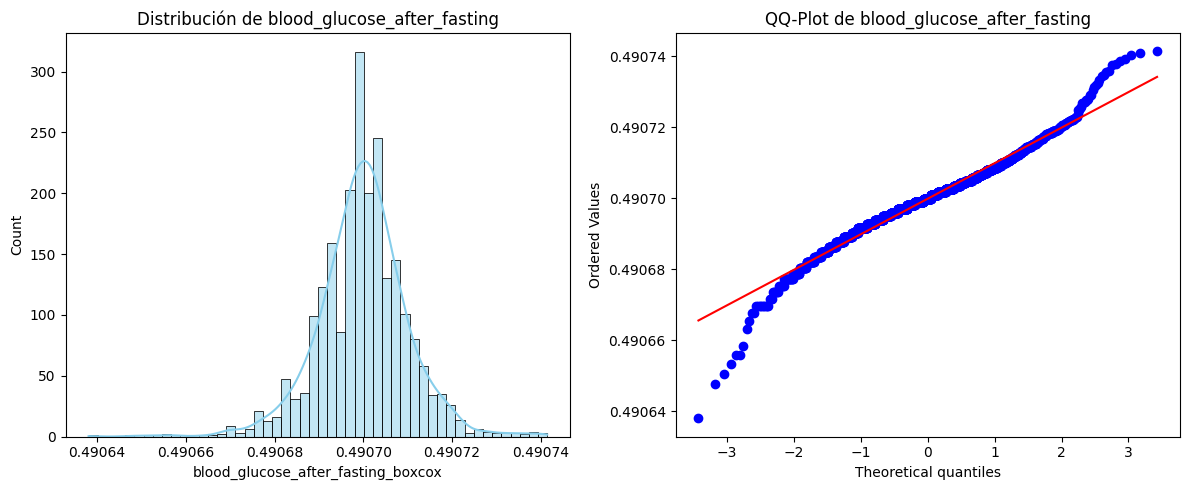


Pruebas de normalidad para la columna: blood_glucose_after_fasting
Shapiro-Wilk Test: p-valor = 1.5198877262425804e-20
Kolmogorov-Smirnov Test: p-valor = 5.5522505665811636e-08
Anderson-Darling Test: Estadístico = 12.19109
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 1.105682705681301e-35
Cramér-von Mises Test: estadístico = 2.09592, p-valor = 7.73050188374036e-06

Procesando la variable: blood_insulin_levels

--- Datos originales ---


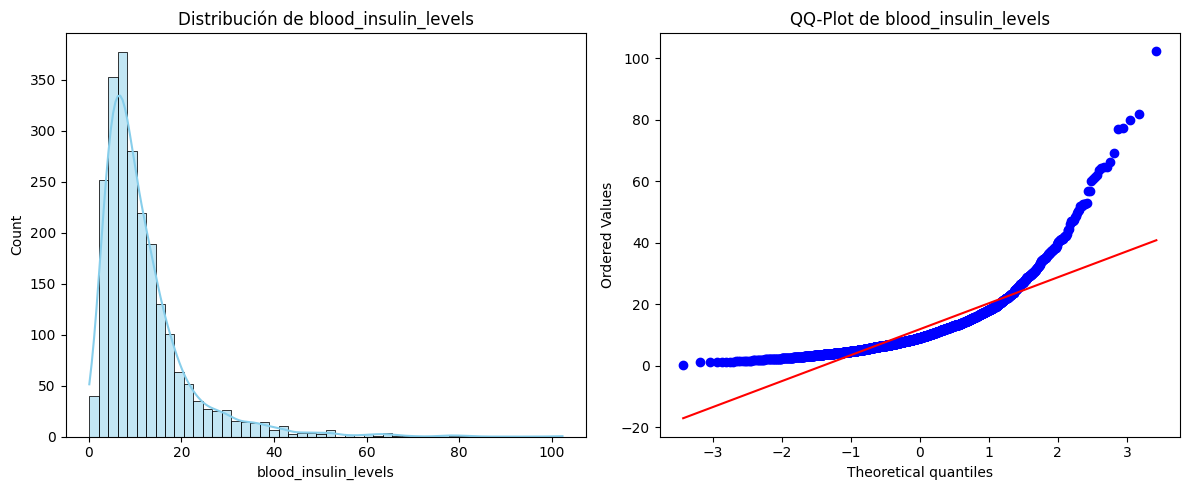


Pruebas de normalidad para la columna: blood_insulin_levels
Shapiro-Wilk Test: p-valor = 7.121708143350059e-50
Kolmogorov-Smirnov Test: p-valor = 8.594238789608384e-47
Anderson-Darling Test: Estadístico = 130.20974
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 3.696365911202981e-308
Cramér-von Mises Test: estadístico = 22.62837, p-valor = 6.663813612028946e-09

Resumen estadístico de 'blood_insulin_levels' CON outliers:
count    2278.000000
mean       11.834794
std         9.718812
min         0.140000
25%         5.860000
50%         9.040000
75%        14.440000
max       102.290000
Name: blood_insulin_levels, dtype: float64

Resumen estadístico de 'blood_insulin_levels' S

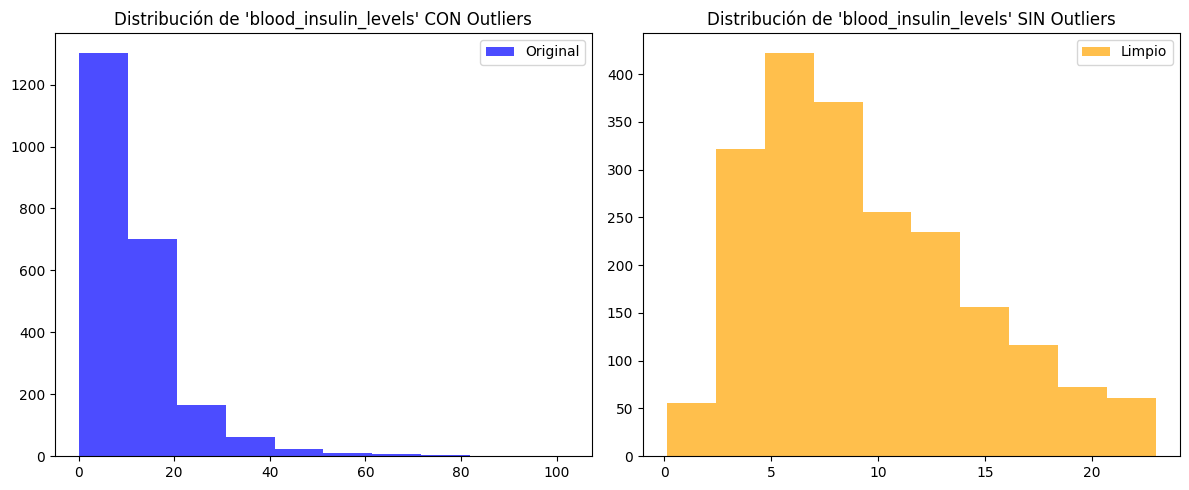

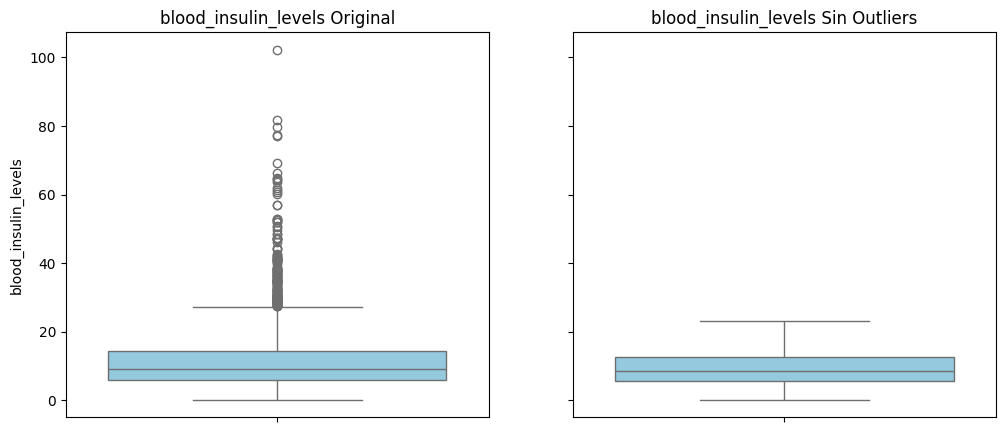


--- Datos sin outliers ---


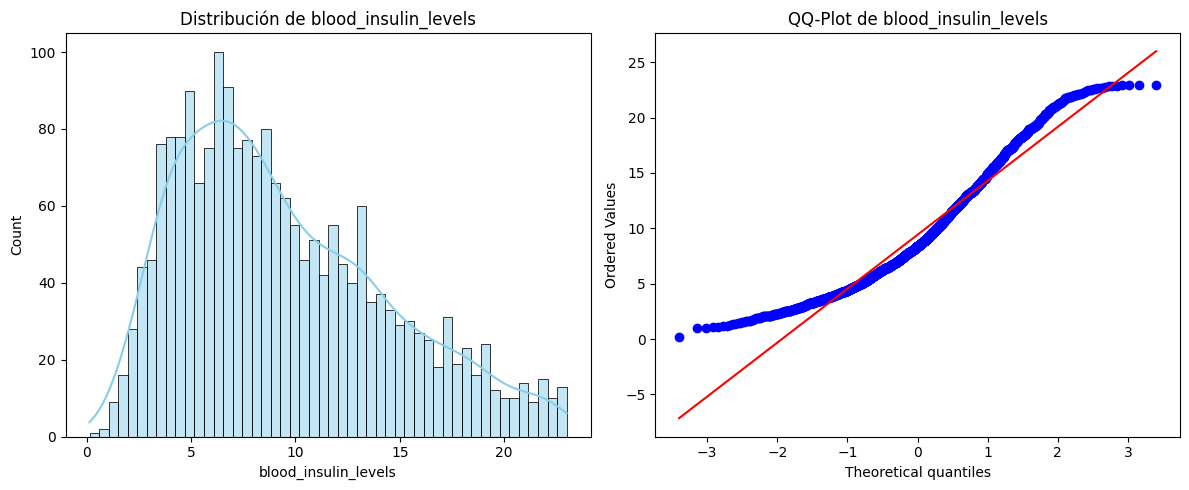


Pruebas de normalidad para la columna: blood_insulin_levels
Shapiro-Wilk Test: p-valor = 5.564151090738744e-26
Kolmogorov-Smirnov Test: p-valor = 1.271960083517242e-13
Anderson-Darling Test: Estadístico = 30.03687
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 1.2842025918201639e-31
Cramér-von Mises Test: estadístico = 4.85084, p-valor = 3.005418136581284e-11

Lambda óptimo para Box-Cox en blood_insulin_levels: -0.01
Estadísticas descriptivas de blood_insulin_levels transformada:
count    2278.000000
mean        2.205424
std         0.691649
min        -1.977668
25%         1.758873
50%         2.187289
75%         2.648887
max         4.564623
Name: blood_insulin_levels_boxc

<ipython-input-112-20573bdb593b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[nueva_columna] = variable_boxcox


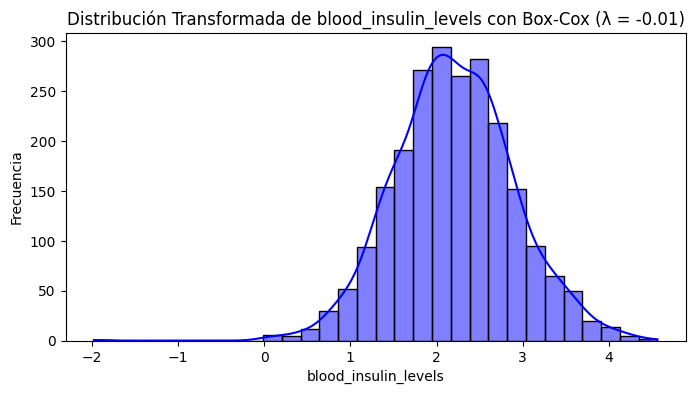


--- Datos transformados (Box-Cox) ---


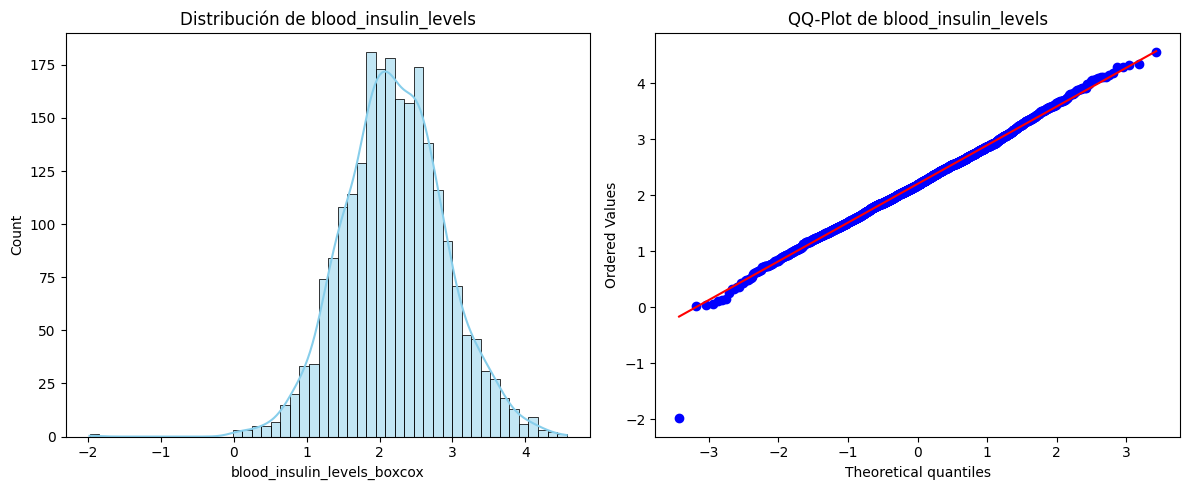


Pruebas de normalidad para la columna: blood_insulin_levels
Shapiro-Wilk Test: p-valor = 2.4419517439534536e-05
Kolmogorov-Smirnov Test: p-valor = 0.7815058492551867
Anderson-Darling Test: Estadístico = 0.74532
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos parecen normales.
  Al nivel de significancia 2.5%, los datos parecen normales.
  Al nivel de significancia 1.0%, los datos parecen normales.
D'Agostino-Pearson Test: p-valor = 2.3615714247768528e-05
Cramér-von Mises Test: estadístico = 0.09871, p-valor = 0.5912579639334841


In [112]:
def aplicar_boxcox(df, variable):

  # Aplica la transformación Box-Cox a la variable

  if (df[variable] <= 0).any():
    print(f"La variable '{variable}' contiene ceros o valores negativos. No se puede aplicar Box-Cox directamente.")
    return None, None
  else:
    variable_boxcox, lambda_optimo = boxcox(df[variable])
    nueva_columna = variable + "_boxcox"
    df[nueva_columna] = variable_boxcox
    print(f"\nLambda óptimo para Box-Cox en {variable}: {lambda_optimo:.2f}")
    print(f"Estadísticas descriptivas de {variable} transformada:")
    print(df[nueva_columna].describe())

    plt.figure(figsize=(8, 4))
    sns.histplot(df[nueva_columna], kde=True, bins=30, color='blue')
    plt.title(f"Distribución Transformada de {variable} con Box-Cox (λ = {lambda_optimo:.2f})")
    plt.xlabel(variable)
    plt.ylabel("Frecuencia")
    plt.show()

    return df, lambda_optimo

# Variables clave a evaluar
variables_clave = ['body_mass_index', 'blood_glucose_after_fasting', 'blood_insulin_levels']

# Randframe contiene las variables clave de df:
randframe = df[['body_mass_index', 'blood_glucose_after_fasting', 'blood_insulin_levels']]

for var in variables_clave:
  print("\n" + "="*80)
  print(f"Procesando la variable: {var}")

  # Prueba de normalidad en los datos originales
  print("\n--- Datos originales ---")
  plot_distribution(randframe[var], var)
  normality_tests(randframe[var], var)

  # Para variables que tienen outliers, aplicar el proceso
  df_clean = proceso_outliers(df, var)
  print("\n--- Datos sin outliers ---")
  plot_distribution(df_clean[var], var)
  normality_tests(df_clean[var], var)

  # Aplicar transformación Box-Cox en los datos originales
  df_transformed, lambda_opt = aplicar_boxcox(randframe, var)
  if df_transformed is not None:
    print("\n--- Datos transformados (Box-Cox) ---")
    plot_distribution(df_transformed[var + "_boxcox"], var)
    normality_tests(df_transformed[var + "_boxcox"], var)


### Resumen de las respuestas encontradas

Primeramente podemos observar en el heatmap que `body_mass_index` y la insulina(`blood_insulin_levels`) están correlacionados de manera positiva y moderada (0.55 de 1), esto indica que mientras BMI aumente la insulina también lo hará. También observamos que `blood_glucose_after_fasting` tiene una correlación baja con BMI (0.21) o insulina (0.21) y `age` está correlacionado de manera leve con BMI (0.15) y glucosa (0.23). Concluímos que BMI e insulina son las que más se influyen entre sí en el dataset.

Al comparar los datos originales con aquellos sin outliers, se notó que eliminar los valores extremos ayuda a tener una visión más "limpia" de los datos, aunque en algunos casos la distribución sigue sin alcanzar la normalidad.

Aplicando la transformación Box-Cox para tratar de normalizar las variables, en el caso de BMI se logró una normalización exitosa (útil para los modelos predictivos, no perfecta) mientras que para glucosa e insulina no se logró, lo cual quiere decir que es necesario aplicar otras transformaciones en ellas.

El pairplot creado por género muestra que en general las relaciones entre BMI, glucosa e insulina se parecen para hombres y mujeres. Sin embargo, se notan pequeñs diferencias en la forma y en la dispersión de los datos. Aunque no son muy marcadas, puede ser algo interesante el ver esto a más detalle en un análisis por subgrupos para determinar si las diferencias son significativas.
